# Problem Statement
XEducation needs a way to help them filter most promising leads that will eventually buy products and services from them.
At present even though the company gets a huge bulk of leads from various sources their conversion rate is just 30%.
XEducation wants to identify Hot leads/Potential leads in order to push their conversion rate beyond 80%.

### Importing the libraries

In [228]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1000)

### Loading the dataset

In [229]:
# Import the dataset
lead = pd.read_csv('E:\\UPGRAD\case study\lead scoring\Lead Scoring Assignment\Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Basic quality check on the data

In [230]:
# Checking the type of each column in the data frame
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [231]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [232]:
# checking for Duplicates
print(lead.duplicated(subset='Lead Number').sum()==0)
print(lead.duplicated(subset='Prospect ID').sum()==0)

True
True


- No Duplicate value found in the dataset.

### Data Preparation

In [233]:
# Converting all the 'Select' keyword from the dataset to NaNs as these are null values
lead = lead.replace('Select', np.nan)

In [234]:
# Missing values percentage in the dataframe
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [235]:
# Removing Columns that have very % of missing values (>70%)
cols_to_rem = ['Lead Profile','How did you hear about X Education']
lead = lead.drop(columns=cols_to_rem, axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Treating missing values

- Treating the Country column

In [236]:
lead.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [237]:
(lead.Country.describe().freq/lead.Country.notnull().sum())*100

95.76633721787874

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

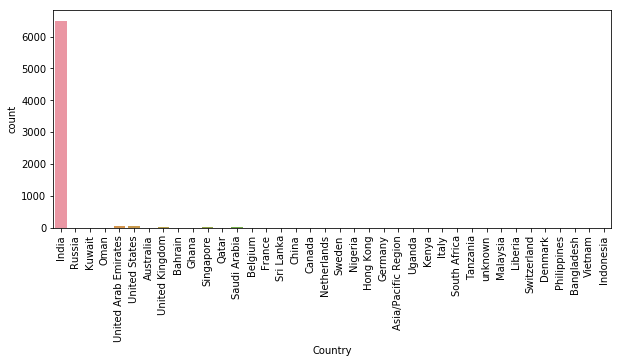

In [238]:
plt.figure(figsize=(10,4))
sns.countplot(lead.Country)
xticks(rotation = 90)

- About 95% of the values in the country column are 'India'. Let's impute all the missing values with India.

In [239]:
# Replacing the missing values in the country column with India
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [240]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Trating the Specialization column

In [241]:
lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

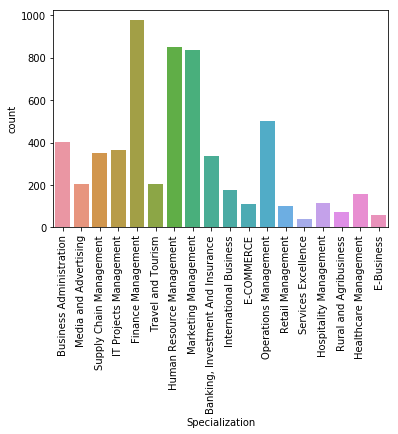

In [242]:
sns.countplot(lead.Specialization)
xticks(rotation =90)

In [243]:
# Lets club all the missing values to  other_Specialization category. 
lead.Specialization = lead.Specialization.replace(np.nan, 'other_Specialization')

In [244]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Treating What is your current occupation column

In [245]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [246]:
(lead['What is your current occupation'].describe().freq/lead['What is your current occupation'].notnull().sum())*100

85.49618320610686

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

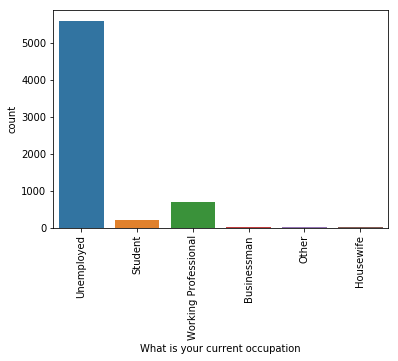

In [247]:
sns.countplot(lead['What is your current occupation'])
xticks(Rotation = 90)

- Around 85% of the values in this column are Unemployed, hence we will impute all the missing values with Unemployed.
- We will also rename column as Occupation and Category 'Other' as other_Occupations.

In [248]:
lead.rename(columns={'What is your current occupation' : 'Occupation'}, inplace = True)
lead['Occupation'] = lead['Occupation'].replace('Other', 'other_Occupations')

In [249]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
Occupation                                       29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Treating What matters most to you in choosing a course, column

In [250]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [251]:
100*(lead['What matters most to you in choosing a course'].describe().freq/lead['What matters most to you in choosing a course'].notnull().sum())


99.95406522737711

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

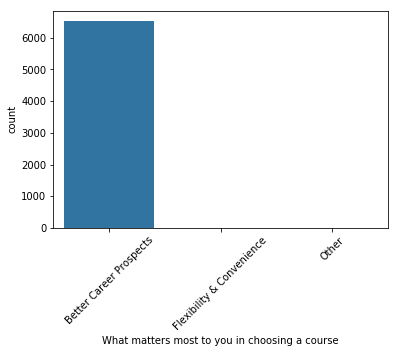

In [252]:
sns.countplot(lead['What matters most to you in choosing a course'])
xticks(rotation =45)

- About 99.9% of the values in this column are Better Career Prospects. Let's impute all the missing values with this value.

In [253]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


In [254]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
Occupation                                       29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Treating Occupation column

In [255]:
lead['Occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: Occupation, dtype: object

In [256]:
100*(lead['Occupation'].describe().freq/lead['Occupation'].notnull().sum())

85.49618320610686

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

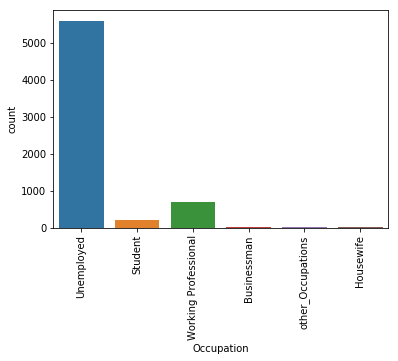

In [257]:
sns.countplot(lead['Occupation'])
xticks(rotation = 90)

- 86% of the values in this column are Unemployed. Replacing all the missing values with Unemployed

In [258]:
lead['Occupation'] = lead['Occupation'].replace(np.nan, 'Unemployed')

In [259]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
Occupation                                        0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [260]:
lead.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [261]:
(lead.Tags.describe().freq/lead.Tags.notnull().sum())*100

35.1961950059453

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

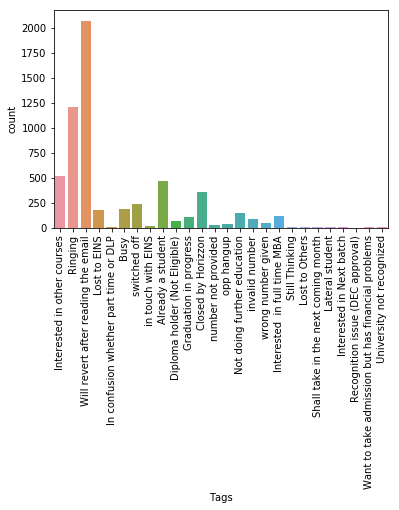

In [262]:
sns.countplot(lead.Tags)
xticks(rotation=90)

- Around 35% of the values in this column are "Will revert after reading the email".
- We will replace the missing values with Will revert after reading the email.

In [263]:
lead.Tags = lead.Tags.replace(np.nan, 'Will revert after reading the email')

In [264]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
Occupation                                        0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Treating Lead Quality

In [265]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

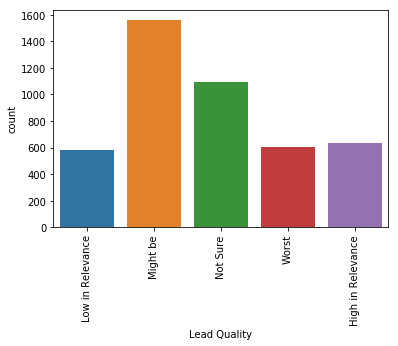

In [266]:
sns.countplot(lead['Lead Quality'])
xticks(rotation =90)

- Looking at different values. "Not Sure" seems to be more sensible choice rather than imputing the missing values with the mode.

In [267]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

In [268]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
Occupation                                        0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Treating the City column

In [269]:
lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [270]:
(lead['City'].describe().freq/lead['City'].notnull().sum())*100

57.83521809369952

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

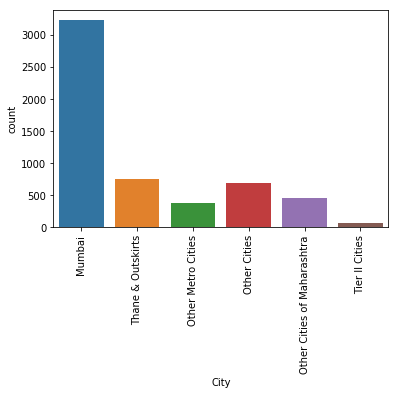

In [271]:
sns.countplot(lead['City'])
xticks(rotation =90)

- Almost 58% of the cities are from Mumbai. Hence imputing missing values with Mumbai

In [272]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [273]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
Occupation                                        0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Treating Asymmetrique Activity Index  //  Asymmetrique Activity Score

In [274]:
lead['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

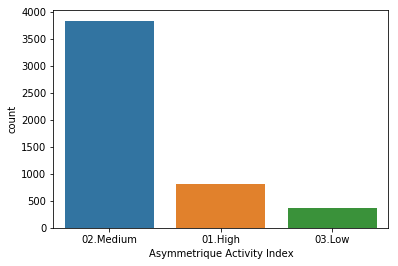

In [275]:
sns.countplot(lead['Asymmetrique Activity Index'])

In [276]:
lead['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

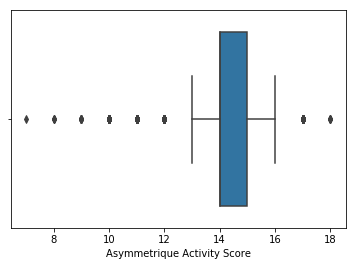

In [277]:
sns.boxplot(lead['Asymmetrique Activity Score'])

Both of these features are interdependent and activity-index is basically calculated based on activity-score. 
Since, both of these features have same number of missing values,probably these values can jeopardise results. 
Removing these columns is a better choice.

In [278]:
lead.drop(columns=['Asymmetrique Activity Score', 'Asymmetrique Activity Index'], axis=1, inplace=True)

In [279]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
Occupation                                        0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Treating Asymmetrique Profile Index  //  Asymmetrique Profile Score

In [280]:
lead['Asymmetrique Profile Index'].describe()

count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object

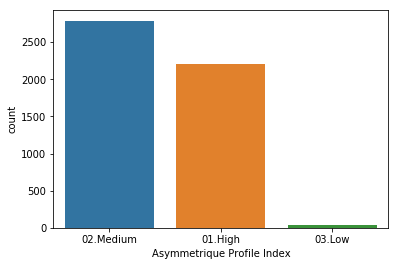

In [281]:
sns.countplot(lead['Asymmetrique Profile Index'])

In [282]:
lead['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

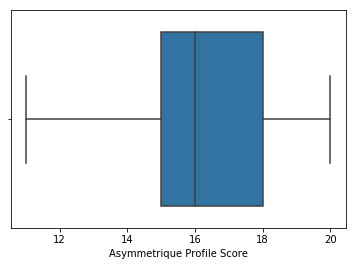

In [283]:
sns.boxplot(lead['Asymmetrique Profile Score'])

Both of these features are interdependent and profile-index is basically calculated based on profile-score. 
Since, both of these features have same number of missing values, probably these values can jeopardise results. 
Removing these columns is a better choice.

In [284]:
lead.drop(columns=['Asymmetrique Profile Score', 'Asymmetrique Profile Index'], axis=1, inplace=True)

In [285]:
# Missing values
round((lead.isnull().sum()/lead.shape[0])*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
Occupation                                       0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

### Lets remove the remaining rows from the dataset that contains missing values

In [286]:
lead.dropna(axis=0, inplace=True)

In [287]:
# Checking the shape of the dataframe
lead.shape

(9074, 31)

In [288]:
# Missing values
(lead.isnull().sum()/lead.shape[0])*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
Occupation                                       0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [289]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,other_Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,other_Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,other_Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


### Univariate Data Analysis

- Converted -> Which is also the Target feature

In [290]:
# Percentage of leads that got converted
(lead.Converted.sum()/lead.Converted.count())*100

37.85541106458012

- Percentage conversion is around 37%

- Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

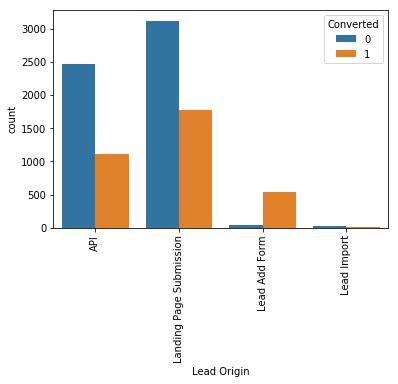

In [291]:
sns.countplot(lead['Lead Origin'], hue=lead.Converted)
xticks(rotation=90)

From above, we can infer that:
- "API" and "Landing Page Submission" are the two major source of Lead origination. However, the conversion rate is not so high for either of these.
- Total count for "Lead Add Form" is less but most of the leads are getting converted.
- If we can improve the conversion rate of "API" and "Landing Page Submission", it will be more fruitfull.

- Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

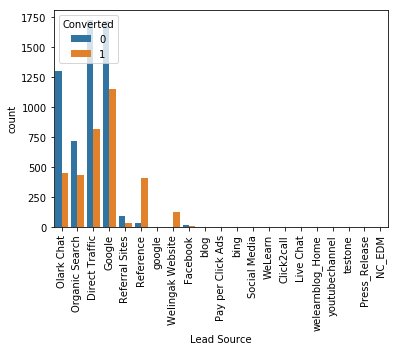

In [292]:
sns.countplot(lead['Lead Source'], hue=lead.Converted)
xticks(rotation=90)

- We can see the maximum conversion rate if the source of leads are "References" or "Welingak Website".
- "Olark Chat", "Direct Traffic" and "Google" accounts for the maximum lead source but the conversion rate is very poor.
- To improve the conversion ration- We can bring in more leads from "References" and "Welingak Website" sources. Also, we can try to improve the conversion of "Olark Chat", "Organic Search", "Direct Traffic", "Google" and "Referral Sites".

### We need to correct misspelling like google in the column.

### We see a lot of irrelevant Sources that are contributing less to the overall objective of the assignment. Hence we can club them to a single source - other_Lead

In [293]:
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['bing', 'Click2call', 'Social Media', 'Press_Release', 'Live Chat', 'Pay per Click Ads', 'testone', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 'blog', 'NC_EDM'], 'other_Lead_Source')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

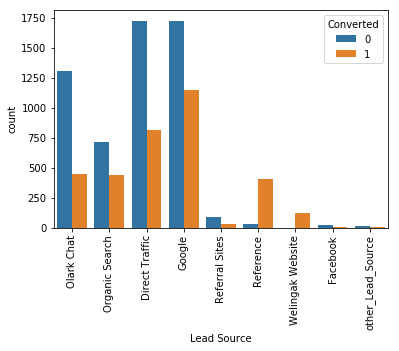

In [294]:
sns.countplot(lead['Lead Source'], hue=lead.Converted)
xticks(rotation=90)

- Do Not Email

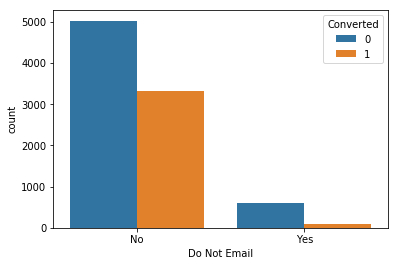

In [295]:
sns.countplot(x=lead['Do Not Email'], hue=lead.Converted)

- Do Not Call

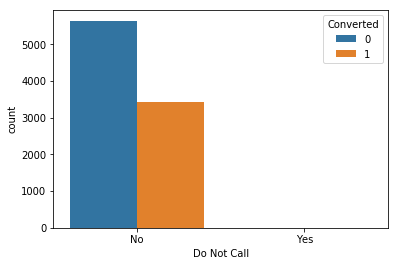

In [296]:
sns.countplot(x=lead['Do Not Call'], hue=lead.Converted)

- TotalVisits

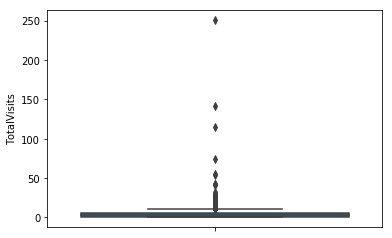

In [297]:
sns.boxplot(y=lead.TotalVisits)

- TotalVisits needs to be treated for outliers.

In [298]:
print(lead.TotalVisits.quantile(list(np.arange(0,1.01,0.01))))

0.00      0.0
0.01      0.0
0.02      0.0
0.03      0.0
0.04      0.0
0.05      0.0
0.06      0.0
0.07      0.0
0.08      0.0
0.09      0.0
0.10      0.0
0.11      0.0
0.12      0.0
0.13      0.0
0.14      0.0
0.15      0.0
0.16      0.0
0.17      0.0
0.18      0.0
0.19      0.0
0.20      0.0
0.21      0.0
0.22      0.0
0.23      0.0
0.24      1.0
0.25      1.0
0.26      1.0
0.27      1.0
0.28      1.0
0.29      2.0
0.30      2.0
0.31      2.0
0.32      2.0
0.33      2.0
0.34      2.0
0.35      2.0
0.36      2.0
0.37      2.0
0.38      2.0
0.39      2.0
0.40      2.0
0.41      2.0
0.42      2.0
0.43      2.0
0.44      2.0
0.45      2.0
0.46      2.0
0.47      3.0
0.48      3.0
0.49      3.0
0.50      3.0
0.51      3.0
0.52      3.0
0.53      3.0
0.54      3.0
0.55      3.0
0.56      3.0
0.57      3.0
0.58      3.0
0.59      3.0
0.60      3.0
0.61      3.0
0.62      4.0
0.63      4.0
0.64      4.0
0.65      4.0
0.66      4.0
0.67      4.0
0.68      4.0
0.69      4.0
0.70      4.0
0.71  

In [299]:
# Capping all the TotalVisits under 10.0 
lead = lead[lead.TotalVisits <= 10.0]

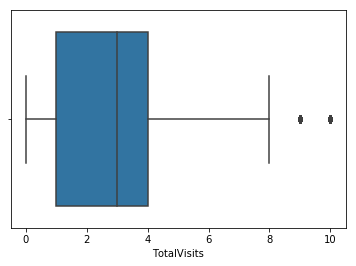

In [300]:
sns.boxplot(x=lead.TotalVisits)

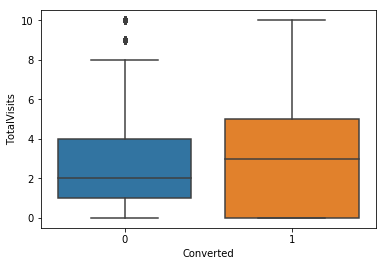

In [301]:
sns.boxplot(y=lead.TotalVisits, x=lead.Converted)

- People who visists frequently are more likely to get converted and the median value for the people who converted is also higher than the ones who didn't.
- We should keep engaging users so that they frequently visist the platform.

- Total Time Spent on Website

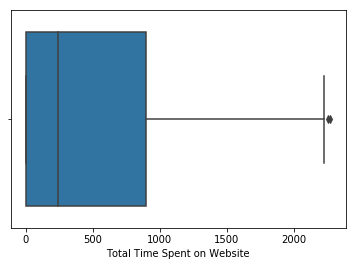

In [302]:
sns.boxplot(lead['Total Time Spent on Website'])

In [303]:
lead['Total Time Spent on Website'].quantile(list(np.arange(0,1.01,0.01)))

0.00       0.0
0.01       0.0
0.02       0.0
0.03       0.0
0.04       0.0
0.05       0.0
0.06       0.0
0.07       0.0
0.08       0.0
0.09       0.0
0.10       0.0
0.11       0.0
0.12       0.0
0.13       0.0
0.14       0.0
0.15       0.0
0.16       0.0
0.17       0.0
0.18       0.0
0.19       0.0
0.20       0.0
0.21       0.0
0.22       0.0
0.23       0.0
0.24       0.0
0.25       2.0
0.26      11.2
0.27      20.4
0.28      30.0
0.29      37.0
0.30      46.0
0.31      56.0
0.32      63.0
0.33      72.0
0.34      80.0
0.35      89.0
0.36      97.0
0.37     107.0
0.38     117.0
0.39     127.0
0.40     136.0
0.41     145.0
0.42     154.0
0.43     164.0
0.44     173.0
0.45     183.0
0.46     195.0
0.47     206.0
0.48     216.0
0.49     227.8
0.50     236.0
0.51     247.0
0.52     257.0
0.53     267.0
0.54     279.0
0.55     291.0
0.56     303.0
0.57     316.4
0.58     330.0
0.59     343.0
0.60     357.0
0.61     370.0
0.62     388.0
0.63     404.0
0.64     424.0
0.65     446.0
0.66     4

In [304]:
# Capping all the TotalVisits under 1551.0 
lead = lead[lead['Total Time Spent on Website'] <= 1551.0]

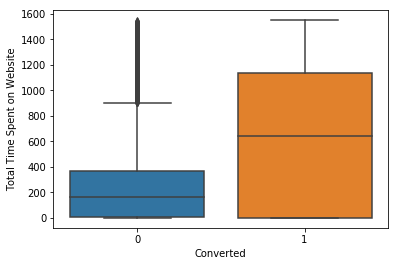

In [305]:
sns.boxplot(y=lead['Total Time Spent on Website'], x=lead.Converted)

- Even here we see similar trend as "Total Visists", More is the amount of time leads spend on the platform higher are the chances for conversions.
- Website should have been tested for best UX and how users can be engaged once they come to the site because this will determine the conversion rate.

- Page Views Per Visit

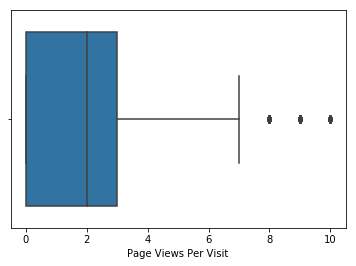

In [306]:
sns.boxplot(lead['Page Views Per Visit'])

In [307]:
lead['Page Views Per Visit'].quantile(list(np.arange(0,1.01,0.01)))

0.00     0.00
0.01     0.00
0.02     0.00
0.03     0.00
0.04     0.00
0.05     0.00
0.06     0.00
0.07     0.00
0.08     0.00
0.09     0.00
0.10     0.00
0.11     0.00
0.12     0.00
0.13     0.00
0.14     0.00
0.15     0.00
0.16     0.00
0.17     0.00
0.18     0.00
0.19     0.00
0.20     0.00
0.21     0.00
0.22     0.00
0.23     0.00
0.24     0.00
0.25     0.00
0.26     0.00
0.27     1.00
0.28     1.00
0.29     1.00
0.30     1.00
0.31     1.00
0.32     1.00
0.33     1.00
0.34     1.33
0.35     1.50
0.36     1.50
0.37     1.50
0.38     1.50
0.39     1.75
0.40     2.00
0.41     2.00
0.42     2.00
0.43     2.00
0.44     2.00
0.45     2.00
0.46     2.00
0.47     2.00
0.48     2.00
0.49     2.00
0.50     2.00
0.51     2.00
0.52     2.00
0.53     2.00
0.54     2.00
0.55     2.00
0.56     2.00
0.57     2.00
0.58     2.00
0.59     2.00
0.60     2.33
0.61     2.50
0.62     2.50
0.63     2.50
0.64     3.00
0.65     3.00
0.66     3.00
0.67     3.00
0.68     3.00
0.69     3.00
0.70     3.00
0.71  

In [308]:
# Capping all the 'Page Views Per Visit' under 6.0
lead = lead[lead['Page Views Per Visit'] <= 6.0]

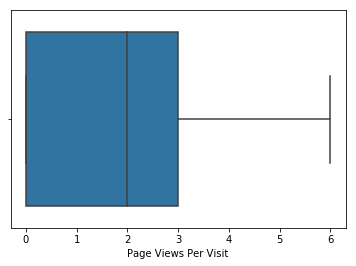

In [309]:
sns.boxplot(lead['Page Views Per Visit'])

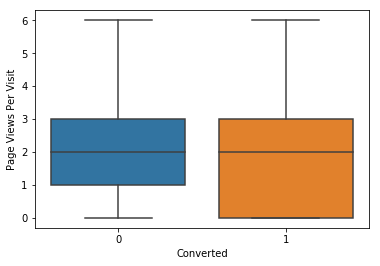

In [310]:
sns.boxplot(y=lead['Page Views Per Visit'], x=lead['Converted'])

- Median for both the conversion types are same around 2. Nothing conclusive can be said.

- Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

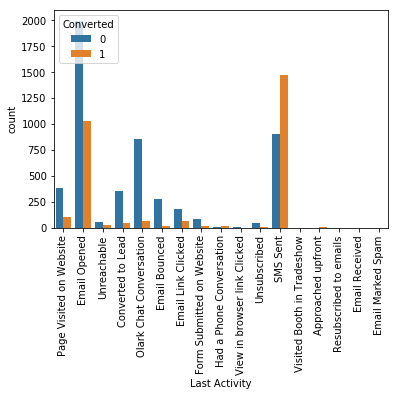

In [311]:
sns.countplot(lead['Last Activity'], hue=lead.Converted)
xticks(rotation=90)

- We also need to club all the insignificant Activities into a single Activity i.e, other_Last_Activity 

In [312]:
lead['Last Activity'] = lead['Last Activity'].replace(['Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'other_Last_Activity')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

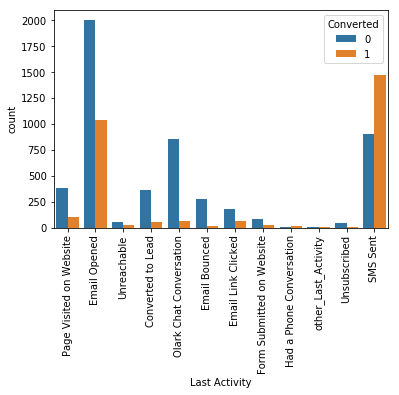

In [313]:
sns.countplot(lead['Last Activity'], hue=lead.Converted)
xticks(rotation=90)

- From above we can see that "SMS Sent" and "Had a Phone Conversation" are the only Activity that accounts most for posistive conversion rate.
- Email is very high in total count however less number of leads are getting converted comparatively.

- Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

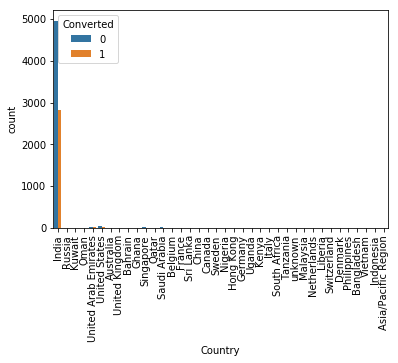

In [314]:
sns.countplot(lead.Country, hue=lead.Converted)
xticks(rotation=90)

- Mostly India dominates rest of the values in the column. Nothing conclusive can be inferred.

- Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

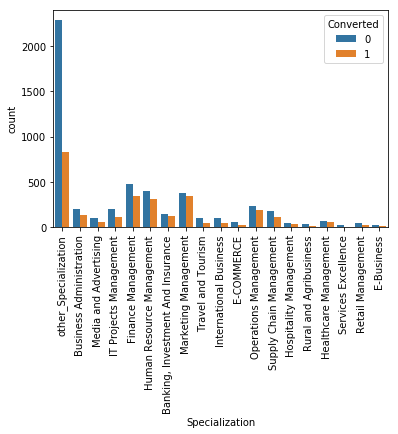

In [315]:
# plt.figure(figsize=(15,10))
sns.countplot(lead.Specialization, hue=lead.Converted)
xticks(rotation=90)

- Specialization that has high conversion rate like "Finance Management", "HR Management", "Operation Management"...etc should be pushed to get more leads in the area.

- Occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

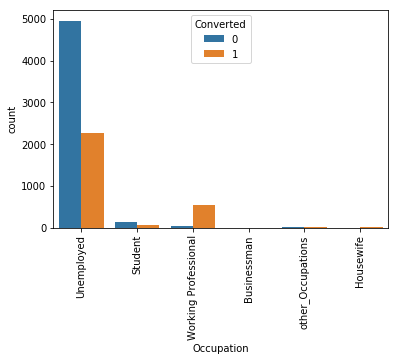

In [316]:
sns.countplot(lead.Occupation, hue=lead.Converted)
xticks(rotation=90)

- "Working professional" has high percentage of conversion rate. Unemployed category should be handeled more wisely in trying to get potential leads from, this will ensure optimal utilizations of company resources.
- All other buckets/categories contribute very marginally.

- What matters most to you in choosing a course

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

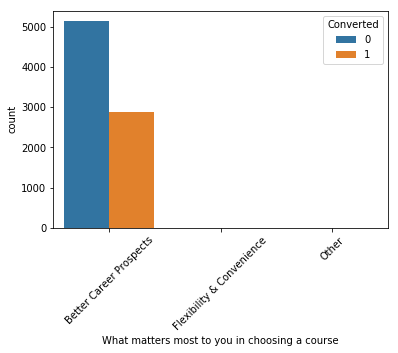

In [317]:
sns.countplot(lead['What matters most to you in choosing a course'], hue=lead.Converted)
xticks(rotation=45)

- Better Carrer Prospect is the only category that contribute substantially towards lead conversion. Nothing major can be inferred from this.

- Search

(array([0, 1]), <a list of 2 Text xticklabel objects>)

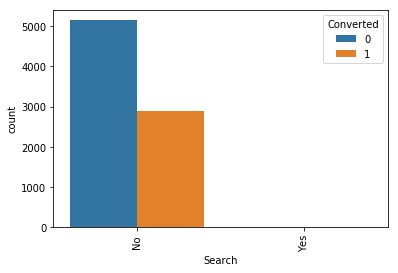

In [318]:
sns.countplot(lead['Search'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Magazine

(array([0]), <a list of 1 Text xticklabel objects>)

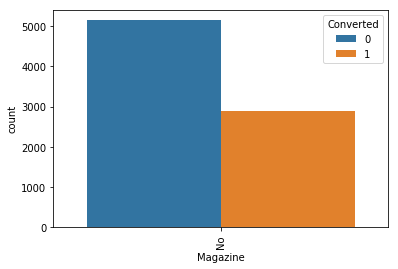

In [319]:
sns.countplot(lead['Magazine'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Newspaper Article

(array([0]), <a list of 1 Text xticklabel objects>)

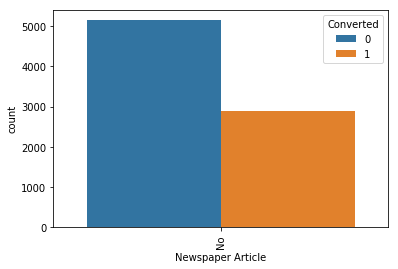

In [320]:
sns.countplot(lead['Newspaper Article'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- X Education Forums

(array([0]), <a list of 1 Text xticklabel objects>)

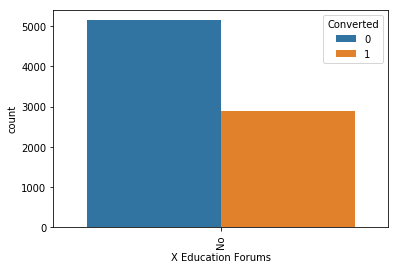

In [321]:
sns.countplot(lead['X Education Forums'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Newspaper

(array([0]), <a list of 1 Text xticklabel objects>)

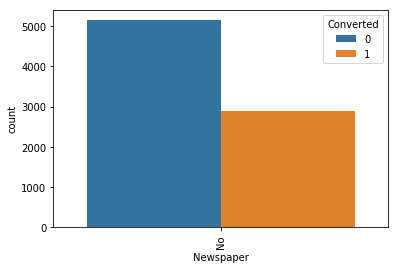

In [322]:
sns.countplot(lead['Newspaper'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Digital Advertisement

(array([0, 1]), <a list of 2 Text xticklabel objects>)

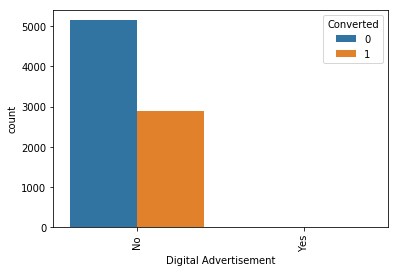

In [323]:
sns.countplot(lead['Digital Advertisement'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Through Recommendations

(array([0, 1]), <a list of 2 Text xticklabel objects>)

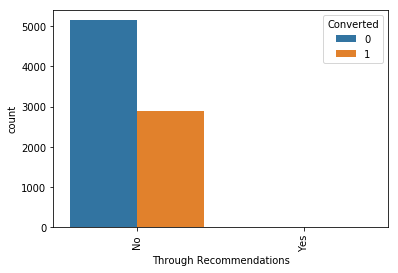

In [324]:
sns.countplot(lead['Through Recommendations'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Receive More Updates About Our Courses

(array([0]), <a list of 1 Text xticklabel objects>)

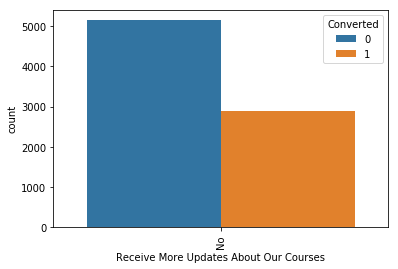

In [325]:
sns.countplot(lead['Receive More Updates About Our Courses'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

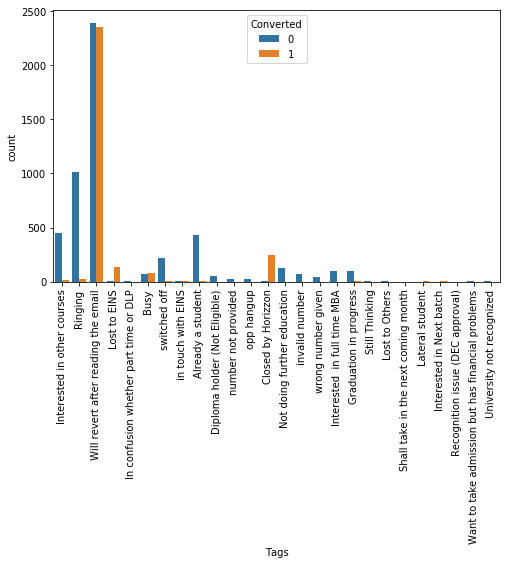

In [326]:
plt.figure(figsize=(8,5))
sns.countplot(lead['Tags'], hue=lead.Converted)
xticks(rotation=90)

- We need to bin all the insignificant categories of Tags.

In [327]:
lead.Tags = lead.Tags.replace(['Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'Interested in Next batch',
       'In confusion whether part time or DLP',
       'Want to take admission but has financial problems', 'Lateral student',
       'University not recognized', 'Shall take in the next coming month',
       'Recognition issue (DEC approval)'], 'other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

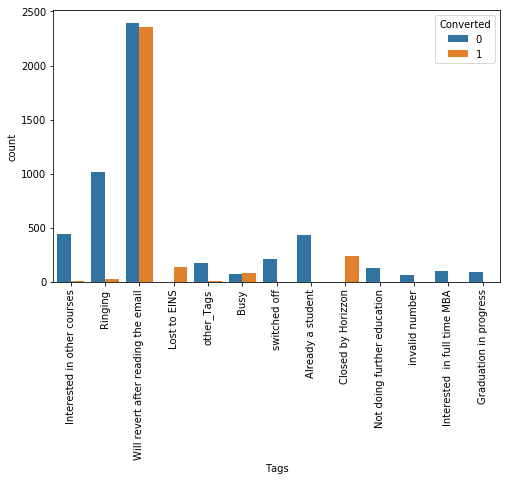

In [328]:
plt.figure(figsize=(8,5))
sns.countplot(lead['Tags'], hue=lead.Converted)
xticks(rotation=90)

- We can see that "Will revert after reading the email" has the highest rate of conversion followed by "Closed By Horizon" and "Lost to ENS".
- There are few categories like "Interested in full time MBA" or "not doing further education" or "Graduation in progress" or "Already a student" which all signify that a studying person will not turn into a potential lead.

- Lead Quality

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

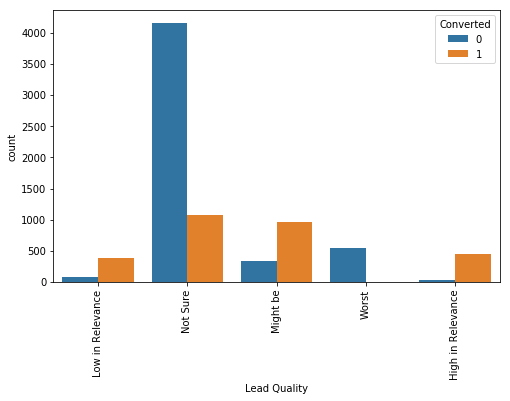

In [329]:
plt.figure(figsize=(8,5))
sns.countplot(lead['Lead Quality'], hue=lead.Converted)
xticks(rotation=90)

- Except "Worst" we can see almost all other categories having good rate of conversions. Not Sure has very total count as we have clubbed the null rows to it due to lack of information.

- Update me on Supply Chain Content

(array([0]), <a list of 1 Text xticklabel objects>)

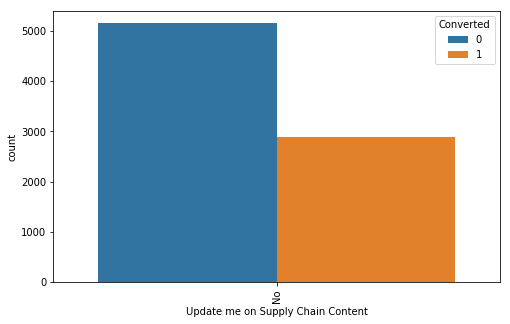

In [330]:
plt.figure(figsize=(8,5))
sns.countplot(lead['Update me on Supply Chain Content'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Get updates on DM Content

(array([0]), <a list of 1 Text xticklabel objects>)

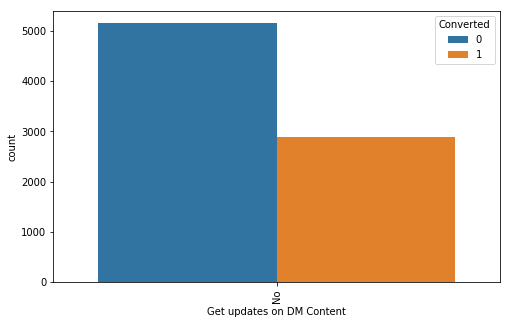

In [331]:
plt.figure(figsize=(8,5))
sns.countplot(lead['Get updates on DM Content'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- City

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

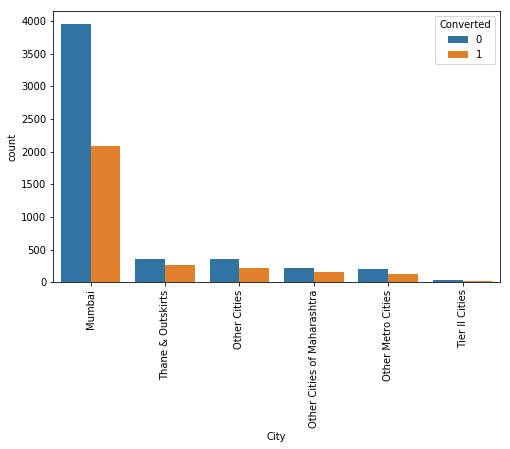

In [332]:
plt.figure(figsize=(8,5))
sns.countplot(lead['City'], hue=lead.Converted)
xticks(rotation=90)

- Major lead conversions are from Mumbai and that where most of the leads are from.

- I agree to pay the amount through cheque

(array([0]), <a list of 1 Text xticklabel objects>)

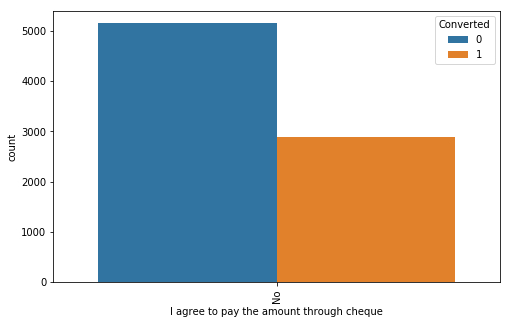

In [333]:
plt.figure(figsize=(8,5))
sns.countplot(lead['I agree to pay the amount through cheque'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- A free copy of Mastering The Interview

(array([0, 1]), <a list of 2 Text xticklabel objects>)

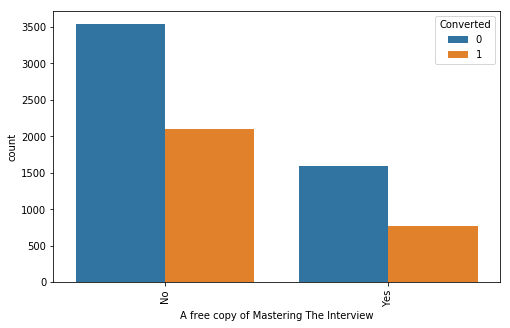

In [334]:
plt.figure(figsize=(8,5))
sns.countplot(lead['A free copy of Mastering The Interview'], hue=lead.Converted)
xticks(rotation=90)

- Nothing conclusive can be inferred from here

- Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

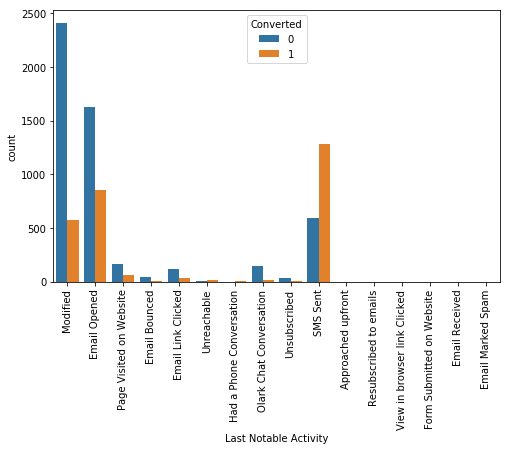

In [335]:
plt.figure(figsize=(8,5))
sns.countplot(lead['Last Notable Activity'], hue=lead.Converted)
xticks(rotation=90)

- Most of the inferences are similar to "Last Activity". There's no new information that this column gives us. Since the former column captures the same information, we can drop either of these.

### Dropping all the irrelevant features/Columns from the dataset

In [336]:
col_to_drop = ['A free copy of Mastering The Interview',
              'I agree to pay the amount through cheque',
              'Get updates on DM Content',
              'Update me on Supply Chain Content',
              'Receive More Updates About Our Courses',
              'Through Recommendations',
              'Digital Advertisement',
              'Newspaper',
              'X Education Forums',
              'Newspaper Article',
              'Magazine',
              'Search',
              'Country',
              'Lead Number',
              'What matters most to you in choosing a course',
              'Prospect ID',
              'Last Notable Activity']
lead.drop(columns = col_to_drop, axis=1, inplace=True)

In [337]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8027.000000,8027.000000,8027.000000,8027.000000
mean,0.359163,2.699514,403.454466,2.028849
std,0.479785,2.334778,471.149958,1.654626
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,207.000000,2.000000
75%,1.000000,4.000000,702.000000,3.000000
max,1.000000,10.000000,1551.000000,6.000000


In [338]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8027 entries, 0 to 9239
Data columns (total 14 columns):
Lead Origin                    8027 non-null object
Lead Source                    8027 non-null object
Do Not Email                   8027 non-null object
Do Not Call                    8027 non-null object
Converted                      8027 non-null int64
TotalVisits                    8027 non-null float64
Total Time Spent on Website    8027 non-null int64
Page Views Per Visit           8027 non-null float64
Last Activity                  8027 non-null object
Specialization                 8027 non-null object
Occupation                     8027 non-null object
Tags                           8027 non-null object
Lead Quality                   8027 non-null object
City                           8027 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB


In [339]:
# Making a copy of the dataframe
lead1 = lead.copy()

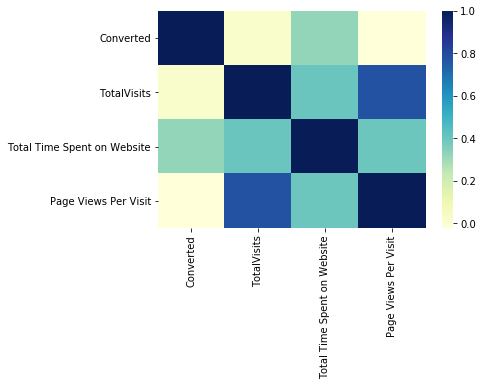

In [340]:
# Making a heatmap
sns.heatmap(lead1.corr(), annot=False, cmap="YlGnBu")

In [341]:
lead1.shape

(8027, 14)

### Encoding for Binary variables

In [342]:
lead1['Do Not Email'] = lead1['Do Not Email'].map({'Yes': 1, 'No': 0})
lead1['Do Not Call'] = lead1['Do Not Call'].map({'Yes': 1, 'No': 0})

### Dummy Variables for Columns with multiple levels

In [343]:
cat_col = lead1.select_dtypes(include='object').columns
dummy_df = pd.get_dummies(lead1[cat_col], drop_first = True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_other_Lead_Source,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_other_Last_Activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Occupation_other_Occupations,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_other_Tags,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [344]:
# Dropping all the categorical columns
lead1.drop(cat_col, axis=1, inplace=True)

In [345]:
# Merging the dummy variables with the original columns
lead1 = pd.concat([lead1,dummy_df], axis=1)

In [346]:
# Shape of th dataframe after creating dummies
lead1.shape

(8027, 72)

In [347]:
lead1.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_other_Lead_Source,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,...,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Occupation_other_Occupations,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_other_Tags,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


### Splitting the data into test and train sets

In [348]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = lead1.drop(['Converted'], axis=1)
# Putting Target variable to y
y = lead1['Converted']

In [349]:
# Split Train and Test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

In [350]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[col_to_scale] = sc.fit_transform(X_train[col_to_scale])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_other_Lead_Source,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Occupation_other_Occupations,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_other_Tags,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2626,0,0,-1.158807,-0.860855,-1.229836,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2973,0,0,0.563804,0.097800,1.185400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
5392,1,0,-0.728154,-0.109591,-0.626027,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
8344,0,0,-1.158807,-0.860855,-1.229836,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1763,0,0,0.133151,-0.287355,0.581591,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [351]:
# Checking the Conversion Rate on y_train to validate the issue of class imbalance
(y_train.sum()/y_train.count())*100

36.11605553577786

In [352]:
# Checking the Conversion Rate on y_test to validate the issue of class imbalance
(y_test.sum()/y_test.count())*100

35.45039435450394

### Building Model

In [353]:
# Importing stats model
import statsmodels.api as sm

In [354]:
# Logistic Regression
# 1st Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5546
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1210.2
Date:                Mon, 10 Jun 2019   Deviance:                       2420.4
Time:                        13:42:39   Pearson chi2:                 5.25e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                      -29.2034   1.33e+05     -0.000      1.000   -2.61e+05    2.61e+05
Do Not Email                                -1.1490      0.313     -3.676      0.000      -1.762      -0.536
Do Not Call                                 23.6446   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                  0.2083      0.088      2.373      0.018       0.036       0.380
Total Time Spent on Website                  1.0108      0.063     15.921      0.000       0.886       1.135
Page Views Per Visit                        -0.1194      0.100     -1.200      0.230      -0.314       0.076
Lead Origin_Landing Page Submission         -0.8565      0.237     -3.607      0.000      -1.322      -0.391
Lead Origin_Lead Add Form                    2.0698      1.878      1.102      0.270      -1.611       5.751
Lead Origin_Lead Import                     28.9804   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                       -28.2907   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                           0.1769      0.161      1.099      0.272      -0.138       0.492
Lead Source_Olark Chat                       1.2380      0.247      5.022      0.000       0.755       1.721
Lead Source_Organic Search                   0.3529      0.220      1.604      0.109      -0.078       0.784
Lead Source_Reference                       -0.1172      1.911     -0.061      0.951      -3.863       3.629
Lead Source_Referral Sites                   0.1731      0.449      0.386      0.700      -0.707       1.053
Lead Source_Welingak Website                 2.9724      2.012      1.477      0.140      -0.971       6.916
Lead Source_other_Lead_Source               -0.0906      1.250     -0.072      0.942      -2.540       2.359
Last Activity_Email Bounced                 -0.1254      0.691     -0.182      0.856      -1.479       1.228
Last Activity_Email Link Clicked             0.2969      0.462      0.643      0.520      -0.608       1.202
Last Activity_Email Opened                   0.8934      0.340      2.626      0.009       0.227       1.560
Last Activity_Form Submitted on Website     -0.1903      0.668     -0.285      0.776      -1.499       1.119
Last Activity_Had a Phone Conversation       1.5295      1.045      1.464      0.143      -0.518       3.577
Last Activity_Olark Chat Conversation       -0.9422      0.405     -2.329      0.020      -1.735      -0.149
Last Activity_Page Visited on Website        0.3308      0.409      0.809      0.418      -0.471       1.132
Last Activity_SMS Sent                       2.7371      0.344      7.962      0.000       2.063       3.411
Last Activity_Unreachable                    0.9713      0.667      1.455      0.146      -0.337       2.279
L

### RFE Feature Selection

In [355]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [356]:
rfe_var = list(zip(X_train, rfe.support_, rfe.ranking_))
rfe_df = pd.DataFrame(rfe_var, columns=['Features', 'Support', 'Ranking'])
rfe_df.sort_values(by=['Ranking'], inplace=True)
rfe_df

,Features,Support,Ranking
0,Do Not Email,True,1
51,Tags_Closed by Horizzon,True,1
50,Tags_Busy,True,1
48,Occupation_Working Professional,True,1
57,Tags_Ringing,True,1
58,Tags_Will revert after reading the email,True,1
61,Tags_switched off,True,1
55,Tags_Lost to EINS,True,1
23,Last Activity_SMS Sent,True,1
21,Last Activity_Olark Chat Conversation,True,1


In [357]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Occupation_Working Professional',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst'],
      dtype='object')

In [358]:
# Building 2nd Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.9
Date:                Mon, 10 Jun 2019   Deviance:                       2883.7
Time:                        13:42:55   Pearson chi2:                 2.24e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6837      0.267    -10.037      0.000      -3.208      -2.160
Do Not Email                                -1.2770      0.219     -5.823      0.000      -1.707      -0.847
Lead Origin_Lead Add Form                    1.1399      0.389      2.930      0.003       0.377       1.902
Lead Source_Welingak Website                 2.7383      0.825      3.319      0.001       1.121       4.355
Last Activity_Olark Chat Conversation       -1.5387      0.214     -7.183      0.000      -1.959      -1.119
Last Activity_SMS Sent                       1.9063      0.105     18.192      0.000       1.701       2.112
Occupation_Working Professional              1.4218      0.298      4.763      0.000       0.837       2.007
Tags_Busy                                    4.2773      0.352     12.142      0.000       3.587       4.968
Tags_Closed by Horizzon                      8.8802      1.068      8.314      0.000       6.787      10.974
Tags_Lost to EINS                            9.0179      0.660     13.671      0.000       7.725      10.311
Tags_Not doing further education           -20.2105   1.16e+04     -0.002      0.999   -2.28e+04    2.27e+04
Tags_Ringing                                -0.3411      0.360     -0.947      0.344      -1.047       0.365
Tags_Will revert after reading the email     4.3900      0.280     15.667      0.000       3.841       4.939
Tags_switched off                           -1.6316      0.777     -2.099      0.036      -3.155      -0.108
Lead Quality_Not Sure                       -3.0862      0.134    -22.960      0.000      -3.350      -2.823
Lead Quality_Worst                          -3.0777      0.916     -3.359      0.001      -4.873      -1.282
============================================================================================================
"""

In [359]:
# Removing "Tags_Not doing further education"
col1 = col.drop('Tags_Not doing further education')

In [360]:
# Building 3rd model
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.2
Date:                Mon, 10 Jun 2019   Deviance:                       2886.4
Time:                        13:43:00   Pearson chi2:                 2.20e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7461      0.266    -10.308      0.000      -3.268      -2.224
Do Not Email                                -1.2778      0.219     -5.833      0.000      -1.707      -0.848
Lead Origin_Lead Add Form                    1.0817      0.378      2.865      0.004       0.342       1.822
Lead Source_Welingak Website                 2.7956      0.820      3.410      0.001       1.189       4.402
Last Activity_Olark Chat Conversation       -1.5387      0.214     -7.183      0.000      -1.959      -1.119
Last Activity_SMS Sent                       1.9114      0.105     18.239      0.000       1.706       2.117
Occupation_Working Professional              1.3964      0.296      4.726      0.000       0.817       1.976
Tags_Busy                                    4.3410      0.352     12.347      0.000       3.652       5.030
Tags_Closed by Horizzon                      8.9556      1.067      8.392      0.000       6.864      11.047
Tags_Lost to EINS                            9.0884      0.659     13.791      0.000       7.797      10.380
Tags_Ringing                                -0.2792      0.360     -0.776      0.438      -0.984       0.426
Tags_Will revert after reading the email     4.4567      0.279     15.977      0.000       3.910       5.003
Tags_switched off                           -1.5714      0.777     -2.022      0.043      -3.094      -0.048
Lead Quality_Not Sure                       -3.0914      0.134    -22.987      0.000      -3.355      -2.828
Lead Quality_Worst                          -3.1391      0.910     -3.449      0.001      -4.923      -1.355
============================================================================================================
"""

In [361]:
# Removing "Tags_Ringing"
col2 = col1.drop('Tags_Ringing')

In [362]:
# Building 4th model
X_train_sm = sm.add_constant(X_train[col2])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5604
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.5
Date:                Mon, 10 Jun 2019   Deviance:                       2887.0
Time:                        13:43:04   Pearson chi2:                 2.18e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8945      0.194    -14.920      0.000      -3.275      -2.514
Do Not Email                                -1.2776      0.219     -5.832      0.000      -1.707      -0.848
Lead Origin_Lead Add Form                    1.0883      0.378      2.882      0.004       0.348       1.828
Lead Source_Welingak Website                 2.7901      0.820      3.404      0.001       1.183       4.397
Last Activity_Olark Chat Conversation       -1.5397      0.214     -7.184      0.000      -1.960      -1.120
Last Activity_SMS Sent                       1.9048      0.104     18.237      0.000       1.700       2.110
Occupation_Working Professional              1.4182      0.296      4.783      0.000       0.837       1.999
Tags_Busy                                    4.4945      0.296     15.198      0.000       3.915       5.074
Tags_Closed by Horizzon                      9.1030      1.052      8.656      0.000       7.042      11.164
Tags_Lost to EINS                            9.2307      0.636     14.525      0.000       7.985      10.476
Tags_Will revert after reading the email     4.6069      0.208     22.110      0.000       4.199       5.015
Tags_switched off                           -1.4187      0.754     -1.883      0.060      -2.896       0.058
Lead Quality_Not Sure                       -3.0918      0.134    -23.014      0.000      -3.355      -2.828
Lead Quality_Worst                          -3.0074      0.907     -3.315      0.001      -4.785      -1.229
============================================================================================================
"""

In [363]:
# Removing "Tags_switched off"
col3 = col2.drop('Tags_switched off')

In [364]:
# Building 5th model
X_train_sm = sm.add_constant(X_train[col3])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1446.0
Date:                Mon, 10 Jun 2019   Deviance:                       2892.0
Time:                        13:43:08   Pearson chi2:                 2.13e+04
No. Iterations:                     9   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0291      0.189    -15.991      0.000      -3.400      -2.658
Do Not Email                                -1.2821      0.219     -5.862      0.000      -1.711      -0.853
Lead Origin_Lead Add Form                    1.1202      0.381      2.936      0.003       0.373       1.868
Lead Source_Welingak Website                 2.7584      0.821      3.358      0.001       1.148       4.368
Last Activity_Olark Chat Conversation       -1.5411      0.214     -7.194      0.000      -1.961      -1.121
Last Activity_SMS Sent                       1.8960      0.104     18.160      0.000       1.691       2.101
Occupation_Working Professional              1.4231      0.296      4.810      0.000       0.843       2.003
Tags_Busy                                    4.6285      0.293     15.817      0.000       4.055       5.202
Tags_Closed by Horizzon                      9.2270      1.051      8.777      0.000       7.167      11.287
Tags_Lost to EINS                            9.3536      0.635     14.736      0.000       8.110      10.598
Tags_Will revert after reading the email     4.7378      0.205     23.152      0.000       4.337       5.139
Lead Quality_Not Sure                       -3.0843      0.134    -22.978      0.000      -3.347      -2.821
Lead Quality_Worst                          -2.8938      0.915     -3.162      0.002      -4.687      -1.100
============================================================================================================
"""

In [365]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [366]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.31
10,Lead Quality_Not Sure,2.13
1,Lead Origin_Lead Add Form,1.67
4,Last Activity_SMS Sent,1.50
2,Lead Source_Welingak Website,1.34
5,Occupation_Working Professional,1.29
3,Last Activity_Olark Chat Conversation,1.23
7,Tags_Closed by Horizzon,1.18
0,Do Not Email,1.11
6,Tags_Busy,1.08


In [367]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2626    0.627258
2973    0.201735
5392    0.065522
8344    0.051340
1763    0.000474
9053    0.201735
5355    0.201735
109     0.002208
697     0.627258
645     0.201735
dtype: float64

In [368]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.27257691e-01, 2.01735070e-01, 6.55215328e-02, 5.13395630e-02,
       4.73711407e-04, 2.01735070e-01, 2.01735070e-01, 2.20827165e-03,
       6.27257691e-01, 2.01735070e-01])

In [369]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred, 'Index ID':y_train.index})
y_train_pred_final.head()

,Converted,Converted_prob,Index ID
0,1,0.627258,2626
1,0,0.201735,2973
2,0,0.065522,5392
3,0,0.051340,8344
4,0,0.000474,1763


In [370]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Index ID,Predicted
0,1,0.627258,2626,1
1,0,0.201735,2973,0
2,0,0.065522,5392,0
3,0,0.051340,8344,0
4,0,0.000474,1763,0


In [371]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3340  249]
 [ 271 1758]]


In [372]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9074403702385191


In [373]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [374]:
# Sensitivity of the model
TP / float(TP+FN)

0.866436668309512

In [375]:
# Specificity of the model
TN / float(TN+FP)

0.930621342992477

In [376]:
# Calculating false postive rate 
print(FP/ float(TN+FP))

0.06937865700752299


In [377]:
# positive predictive value 
print (TP / float(TP+FP))

0.8759342301943199


In [378]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9249515369703684


In [379]:
# Making hte ROC corve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [380]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

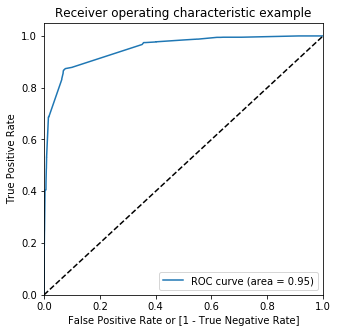

In [381]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [382]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Index ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.627258,2626,1,1,1,1,1,1,1,1,0,0,0
1,0,0.201735,2973,0,1,1,1,0,0,0,0,0,0,0
2,0,0.065522,5392,0,1,0,0,0,0,0,0,0,0,0
3,0,0.051340,8344,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000474,1763,0,1,0,0,0,0,0,0,0,0,0


In [383]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.361161  1.000000  0.000000
0.1   0.1  0.760413  0.974372  0.639454
0.2   0.2  0.763617  0.966979  0.648649
0.3   0.3  0.905838  0.873337  0.924213
0.4   0.4  0.907618  0.867422  0.930343
0.5   0.5  0.907440  0.866437  0.930621
0.6   0.6  0.904414  0.856087  0.931736
0.7   0.7  0.876646  0.689009  0.982725
0.8   0.8  0.876646  0.689009  0.982725
0.9   0.9  0.825205  0.532282  0.990805


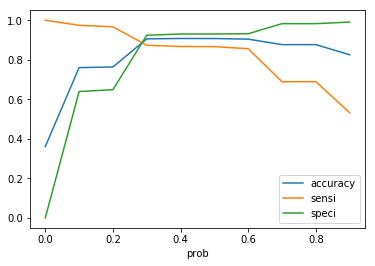

In [384]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [385]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Index ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.627258,2626,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.201735,2973,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.065522,5392,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.051340,8344,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000474,1763,0,1,0,0,0,0,0,0,0,0,0,0


In [388]:
# Assigning a lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Index ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.627258,2626,1,1,1,1,1,1,1,1,0,0,0,1,63
1,0,0.201735,2973,0,1,1,1,0,0,0,0,0,0,0,0,20
2,0,0.065522,5392,0,1,0,0,0,0,0,0,0,0,0,0,7
3,0,0.051340,8344,0,1,0,0,0,0,0,0,0,0,0,0,5
4,0,0.000474,1763,0,1,0,0,0,0,0,0,0,0,0,0,0


In [389]:
# Checking the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9058383766464934

In [390]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [391]:
# Sensitivity of the model
TP / float(TP+FN)

0.8733366190241498

In [392]:
# Specificity of the model
TN / float(TN+FP)

0.9242128726664809

In [393]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.07578712733351908


In [394]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8669275929549902


In [395]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9280917739227756


### Precision and Recall

In [396]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3340,  249],
       [ 271, 1758]], dtype=int64)

In [397]:
# Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8759342301943199

In [398]:
# Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.866436668309512

In [399]:
from sklearn.metrics import precision_score, recall_score

In [400]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.8759342301943199

In [401]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.866436668309512

### Precision and recall tradeoff

In [402]:
from sklearn.metrics import precision_recall_curve

In [403]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      0
 14      1
 15      0
 16      0
 17      0
 18      0
 19      1
 20      0
 21      1
 22      0
 23      0
 24      0
 25      1
 26      1
 27      1
 28      0
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      0
 36      1
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      1
 44      0
 45      0
 46      0
 47      0
 48      1
 49      1
 50      1
 51      1
 52      0
 53      0
 54      1
 55      0
 56      0
 57      0
 58      0
 59      1
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      0
 68      1
 69      1
 70      0
 71      0
 72      0
 73      0
 74      0
 75      1
 76      0
 77      1
 78      1
 79      0
 80      1
 81      1
 82      0
 83      0
 84      0
 85      1
 86      1
 87      0
 88      0
 89      0
 90      0

In [404]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

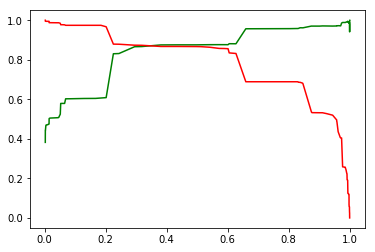

In [405]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [406]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = sc.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_other_Lead_Source,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Occupation_other_Occupations,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_other_Tags,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2375,1,0,-0.304539,-0.397012,-0.006250,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5128,0,0,-0.304539,-0.364940,-0.006250,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2484,0,0,0.118549,0.926462,-0.309176,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2445,0,0,0.118549,-0.835319,0.599603,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4014,0,0,-1.150714,-0.846009,-1.217955,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [407]:
X_test = X_test[col3]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Lead Quality_Not Sure,Lead Quality_Worst
2375,1,0,0,0,0,0,0,0,0,0,1,0
5128,0,0,0,0,1,0,0,0,0,0,1,0
2484,0,0,0,0,1,0,0,0,0,1,1,0
2445,0,0,0,0,1,0,0,0,0,1,1,0
4014,0,0,0,0,0,0,0,0,0,1,0,0


In [408]:
X_test_sm = sm.add_constant(X_test)

In [409]:
y_test_pred = res.predict(X_test_sm)

In [410]:
y_test_pred[:10]

2375    0.000614
5128    0.014523
2484    0.627258
2445    0.627258
4014    0.846680
3185    0.999912
946     0.627258
1707    0.051340
4333    0.627258
89      0.002208
dtype: float64

In [411]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2375,0.000614
5128,0.014523
2484,0.627258
2445,0.627258
4014,0.846680


In [412]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [413]:
# Putting CustID to index
y_test_df['Index ID'] = y_test_df.index

In [414]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [415]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [416]:
y_pred_final.head()

,Converted,Index ID,0
0,0,2375,0.000614
1,0,5128,0.014523
2,1,2484,0.627258
3,0,2445,0.627258
4,1,4014,0.846680


In [417]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [418]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Index ID','Converted','Converted_prob'], axis=1)

In [419]:
y_pred_final.head()

,Index ID,Converted,Converted_prob
0,2375,0,0.000614
1,5128,0,0.014523
2,2484,1,0.627258
3,2445,0,0.627258
4,4014,1,0.846680


In [420]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [421]:
y_pred_final.final_predicted.sum()/y_pred_final.final_predicted.count()

0.3594852635948526

In [422]:
# Assigning a lead score
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [423]:
y_pred_final.head()

,Index ID,Converted,Converted_prob,final_predicted,Lead_Score
0,2375,0,0.000614,0,0
1,5128,0,0.014523,0,1
2,2484,1,0.627258,1,63
3,2445,0,0.627258,1,63
4,4014,1,0.846680,1,85


In [424]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.900373599003736

In [425]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1429,  126],
       [ 114,  740]], dtype=int64)

In [426]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [427]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8665105386416861

In [428]:
# Let us calculate specificity
TN / float(TN+FP)

0.9189710610932476

In [429]:
# Positive Pridicted Value
TP/float(FP+TP)

0.8545034642032333

In [430]:
# Negative Pridicted Value
TN/ float(FN+TN)

0.9261179520414776

In [431]:
# Precision
Precision = TP / float(TP + FP)

In [432]:
# Recall
Recall = TP / float(TP + FN)
Recall

0.8665105386416861

In [433]:
# F1 Score
2* (Precision*Recall)/(Precision+Recall)

0.8604651162790697